# PROJECT TITLE 

## Overview

Airbnb Musketeers LLC was founded to help aspiring Airbnb owners to purchase a house in order to start up their Airbnb business. Arthur Macintosh, a local businessman, reached out to our company and asked for us to help him purchase a home in King County, Washington. Mr. Macintosh had specified that he wanted his house in King County to have at least 3 bedrooms, and 2 bathrooms, a view, and for it to be under $750,000. The goal of this data analysis is to give Mr.Macintosh recommendations on what houses he should consider with the specifications that he gave us. We used housing data for King County. This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. The data originally consisted of 21,597 houses that were built between 1900 and 2015. We narrowed that number by dropping nulls which brought the data to 15,762 houses. We further narrowed that number by dropping houses that had more than 4 bedrooms in order get rid of outliers which left us with 14,342 houses. After all of those reductions we were left with roughly 2/3 of the data to work with. The methods we used to clean our data and. create our models were train-test-split, OLS models, removing irrelevant data, filtering unwanted outliers, handling missing data. After a deep analysis of our data we came to the conclusion that Mr. Macintosh should purchase a home in the Metro Area with Average/Below Average Square Footage 
 Bedrooms 3, Bathrooms 2 minimum

## Business Problem

Mr.Macintosh wants to buy a house so that he can be in the Airbnb business. He is set on the amount of money that he is willing to invest in the purchase of the house. Our predictions are important in order to be able to help Mr.Macintosh to not go over budget. This is not the only house that we are helping him purchase which is why it is important that we find a house with the requirements he set in order for him to be able to price the rental of the home at a rate that generates him the most profit. If he goes over budget that would mean less amount of money that he can spend on the other houses he is also interested on buying outside of King County, Washington.

## Data Understanding

The data that we are using came from the King County Houses database. The data relates to our analysis question because it contains all the data that we need in order to be able to deliver to Mr.Macintosh the types of houses that he should consider buying based on his prerequisites. The main target variable is price. Other variables that we intend to use are price, bedrooms(# of bedrooms in the home), bathrooms(# of bathrooms in the home), sqft_living(Square footage of living space in the home), view(quality of view from house - represented by {"NONE": 1, "FAIR": 2, "AVERAGE": 3, "GOOD": 4, "EXCELLENT": 5}), Area(the distance the home is from Seattle in miles). We cleaned up the data by removing irrelevant data, filtering unwanted outliers, scaling, and handling missing data.


In [147]:
import pandas as pd 

from IPython.display import Markdown, display

In [148]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [149]:
df = pd.read_csv('data/kc_house_data.csv')
df.head(100)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1483300570,9/8/2014,905000.0,4,2.50,3300,10250,1.0,NO,NONE,...,7 Average,2390,910.0,1946,1991.0,98040,47.5873,-122.249,1950,6045
96,3422049190,3/30/2015,247500.0,3,1.75,1960,15681,1.0,NO,NONE,...,7 Average,1960,0.0,1967,0.0,98032,47.3576,-122.277,1750,15616
97,1099611230,9/12/2014,199000.0,4,1.50,1160,6400,1.0,NO,NONE,...,7 Average,1160,0.0,1975,0.0,98023,47.3036,-122.378,1160,6400
98,722079104,7/11/2014,314000.0,3,1.75,1810,41800,1.0,NO,NONE,...,7 Average,1210,600.0,1980,0.0,98038,47.4109,-121.958,1650,135036


## Data Preparation

#### What variables were kept?

- price
- bedrooms
- bathrooms
- sqft_living
- floor
- zip code
- view

#### Were there variables you dropped or created?

- id
- date
- sqft_lot
- waterfront
- condition
- grade
- sqft_above
- sqft_basement
- yr_ renovated
- lat
- long
- sqft_living15
- sqft_lot15

#### How did you address missing values or outliers?

- We dropped null values including question marks.

#### Why are these choices appropriate given the data and the business problem?

- It was appropriate to drop the variables above because they did not have numeric values and would not fit in our model

#### How much of the data have we dropped?

- We narrowed that number by dropping nulls which brought the data to 15,762 houses. We further narrowed that number by dropping houses that had more than 5 bedrooms in order get rid of outliers which left us with 14,342 houses. After all of those reductions we were left we dropped 1/3 of the data leaving us with roughly 2/3 of the data to work with.

In [150]:
df = df.dropna()

In [151]:
df['view'].replace({"NONE": 1, "FAIR": 2, "AVERAGE": 3, "GOOD": 4, "EXCELLENT": 5}, inplace=True)

In [152]:
df['grade'].unique()

array(['7 Average', '8 Good', '11 Excellent', '9 Better', '6 Low Average',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [153]:
df['grade'].replace({'7 Average': 7 , '8 Good': 8, '11 Excellent': 11, '9 Better': 9, '6 Low Average': 6,
       '5 Fair': 5, '10 Very Good': 10, '12 Luxury': 12, '4 Low': 4, '3 Poor': 3,
       '13 Mansion': 13}, inplace=True)

In [154]:
def find_dist(lat_cell, long_cell):
    seattle_lat = 47.6062
    seattle_long = -122.3321
    distance = np.sqrt((lat_cell-seattle_lat)**2 + (long_cell-seattle_long)**2)
    return distance

In [155]:
df['Area'] = df.apply(lambda x: find_dist(x['lat'], x['long']), axis=1)

In [156]:
Area = []
for x in df['Area']:
    miles = round(x * 69)
    Area.append(miles)

In [157]:
df['Area'] = Area

In [158]:
# df['Area'].replace({<10: 0, >10: 1}, inplace=True)
df['Area'] = df['Area'].apply(lambda x: 0 if x < 10 else 1)

In [159]:
city = df.loc[df['Area'] == 1 ]
metro = df.loc[df['Area'] == 0 ]

In [160]:
metro['price'].mean() - city['price'].mean() 

137956.60226789635

In [161]:
city.loc[(city['price'] < 750000) & (city['sqft_living'] > 2420)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Area
24,3814700200,11/20/2014,329000.0,3,2.25,2450,6500,2.0,NO,1,...,2450,0.0,1985,0.0,98030,47.3739,-122.172,2200,6865,1
29,1873100390,3/2/2015,719000.0,4,2.50,2570,7173,2.0,NO,1,...,2570,0.0,2005,0.0,98052,47.7073,-122.110,2630,6026,1
39,2078500320,6/20/2014,605000.0,4,2.50,2620,7553,2.0,NO,1,...,2620,0.0,1996,0.0,98056,47.5301,-122.180,2620,11884,1
51,7231300125,2/17/2015,345000.0,5,2.50,3150,9134,1.0,NO,1,...,1640,1510.0,1966,0.0,98056,47.4934,-122.189,1990,9133,1
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,NO,1,...,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21555,3345700207,5/2/2015,608500.0,4,3.50,2850,5577,2.0,NO,1,...,1950,900.0,2014,0.0,98056,47.5252,-122.192,2850,5708,1
21559,9578500790,11/11/2014,399950.0,3,2.50,3087,5002,2.0,NO,1,...,3087,0.0,2014,0.0,98023,47.2974,-122.349,2927,5183,1
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,NO,1,...,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000,1
21573,7570050450,9/10/2014,347500.0,3,2.50,2540,4760,2.0,NO,1,...,2540,0.0,2010,0.0,98038,47.3452,-122.022,2540,4571,1


In [162]:
metro['price'].describe()

count    5.863000e+03
mean     6.279580e+05
std      4.639080e+05
min      8.200000e+04
25%      3.717500e+05
50%      5.099900e+05
75%      7.200000e+05
max      7.700000e+06
Name: price, dtype: float64

In [163]:
city['price'].describe()

count    9.899000e+03
mean     4.900014e+05
std      2.934036e+05
min      8.300000e+04
25%      2.999900e+05
50%      4.220000e+05
75%      5.991900e+05
max      5.110000e+06
Name: price, dtype: float64

In [164]:
city['bedrooms'].mean() - metro['bedrooms'].mean()  

0.26228797947793936

In [165]:
metro['bathrooms'].describe()

count    5863.000000
mean        1.977486
std         0.848567
min         0.500000
25%         1.000000
50%         2.000000
75%         2.500000
max         8.000000
Name: bathrooms, dtype: float64

In [166]:
city['sqft_living'].describe()

count     9899.000000
mean      2197.434387
std        888.700235
min        440.000000
25%       1570.000000
50%       2050.000000
75%       2670.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [167]:
df = df.drop(columns=['id', 'date', 'waterfront', 'condition', 'lat', 'long', 'sqft_basement', 'sqft_lot', 'sqft_above', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'zipcode','floors'])
df

,price,bedrooms,bathrooms,sqft_living,view,grade,Area
1,538000.0,3,2.25,2570,1,7,0
3,604000.0,4,3.00,1960,1,7,0
4,510000.0,3,2.00,1680,1,8,1
5,1230000.0,4,4.50,5420,1,11,1
6,257500.0,3,2.25,1715,1,7,1
...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1,8,0
21592,360000.0,3,2.50,1530,1,8,0
21593,400000.0,4,2.50,2310,1,8,0
21594,402101.0,2,0.75,1020,1,7,0


In [168]:
df = df.loc[df['bedrooms']<=4]
df

,price,bedrooms,bathrooms,sqft_living,view,grade,Area
1,538000.0,3,2.25,2570,1,7,0
3,604000.0,4,3.00,1960,1,7,0
4,510000.0,3,2.00,1680,1,8,1
5,1230000.0,4,4.50,5420,1,11,1
6,257500.0,3,2.25,1715,1,7,1
...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1,8,0
21592,360000.0,3,2.50,1530,1,8,0
21593,400000.0,4,2.50,2310,1,8,0
21594,402101.0,2,0.75,1020,1,7,0


## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

<AxesSubplot:>

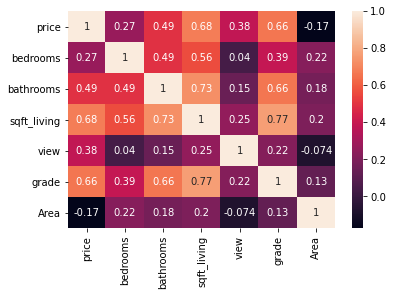

In [169]:
sns.heatmap(df.corr(), annot=True)

In [170]:
X= df.drop(columns='price')
Y= df['price']

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [172]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X_train)
results = sm.OLS(y_train, sm.add_constant(X_train)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3254.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:32:46   Log-Likelihood:            -1.4589e+05
No. Observations:               10757   AIC:                         2.918e+05
Df Residuals:                   10750   BIC:                         2.918e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.92e+05   1.69e+04    -23.265      0.000   -4.25e+05   -3.59e+05
bedrooms    -3.163e+04   3225.686     -9.806      0.000    -3.8e+04   -2.53e+04
bathrooms   -1.586e+04   3875.886     -4.092      0.000   -2.35e+04   -8263.979
sqft_living   198.5233      4.187     47.419      0.000     190.317     206.730
view         6.844e+04   2641.198     25.914      0.000    6.33e+04    7.36e+04
grade        9.015e+04   2583.242     34.899      0.000    8.51e+04    9.52e+04
Area        -1.896e+05   3899.080    -48.629      0.000   -1.97e+05   -1.82e+05
==============================================================================
Omnibus:                     5615.187   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            99688.355
Skew:                           2.097   Prob(JB):                         0.00
Kurtosis:                      17.311   Cond. No.                     2.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation

- This model explains 48% of our variance in our Y
- Bathrooms and Square foot of the house are statistically significant with a p-value of 0.
- one additional bedroom unit drives down the expected price by about -6.948e+04
- one additional sqft_living unit drives up the expected price by about 296.

In [173]:
X_test_scaled = ss.fit_transform(X_test)
results = sm.OLS(y_test, sm.add_constant(X_test)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     1040.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:32:46   Log-Likelihood:                -48918.
No. Observations:                3586   AIC:                         9.785e+04
Df Residuals:                    3579   BIC:                         9.789e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.188e+05   3.17e+04    -13.201      0.000   -4.81e+05   -3.57e+05
bedrooms    -2.773e+04   5961.785     -4.651      0.000   -3.94e+04    -1.6e+04
bathrooms   -1.586e+04   7230.744     -2.194      0.028      -3e+04   -1683.910
sqft_living   210.1612      7.700     27.293      0.000     195.064     225.259
view         9.048e+04   4818.686     18.778      0.000     8.1e+04    9.99e+04
grade        8.392e+04   4838.481     17.345      0.000    7.44e+04    9.34e+04
Area        -1.816e+05   7304.864    -24.866      0.000   -1.96e+05   -1.67e+05
==============================================================================
Omnibus:                     2286.915   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72671.305
Skew:                           2.531   Prob(JB):                         0.00
Kurtosis:                      24.465   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [174]:
X2= df['bedrooms']
Y2= df['price']

In [175]:
model_no_intercept = sm.OLS(Y2, X2)
results_no_intercept = model_no_intercept.fit()
results_no_intercept.params

bedrooms    159709.464849
dtype: float64

In [176]:
random_X = [1, 3 , 5 ]
results_no_intercept.predict(random_X)

array([159709.46484948, 479128.39454843, 798547.32424738])

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(X_tr, X_te, y_tr, y_te, log=False):
    '''
   This function takes in the arguments X_train, X_test, y_train, y_test
   -Create and fit model
   -Print summary
   -Grab predictions
   -Evaluate on train and test
   -Visualize residuals
   
   I got this from Lindsey :)
    '''
    # Create and fit model
    model = sm.OLS(y_tr, sm.add_constant(X_tr)).fit()
    
    # Print summary (if OLS)
    print(model.summary())
    
    # Grab predictions
    tr_preds = model.predict(sm.add_constant(X_tr))    
    te_preds = model.predict(sm.add_constant(X_te))
    
    # Evaluate on train and test
    print("*"*20)
    print(f"Train R2 Score: {r2_score(y_tr, tr_preds):.4f}")
    if log == True:
        y_tr_unlog = np.expm1(y_tr)
        tr_preds_unlog = np.expm1(tr_preds)      
        print(f"Train MAE Score: ${mean_absolute_error(y_tr_unlog, tr_preds_unlog):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_tr_unlog, tr_preds_unlog, squared=False):.4f}")
    else:
        print(f"Train MAE Score: ${mean_absolute_error(y_tr, tr_preds):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_tr, tr_preds, squared=False):.4f}")
    print("*"*20)
    print(f"Test R2 Score: {r2_score(y_te, te_preds):.4f}")
    if log == True:
        y_te_unlog = np.expm1(y_te)
        te_preds_unlog = np.expm1(te_preds)
        print(f"Test MAE Score: ${mean_absolute_error(y_te_unlog, te_preds_unlog):.4f}")
        print(f"Test RMSE Score: ${mean_squared_error(y_te_unlog, te_preds_unlog, squared=False):.4f}")          
    else:
        print(f"Test MAE Score: ${mean_absolute_error(y_te, te_preds):.4f}")
        print(f"Test RMSE Score: ${mean_squared_error(y_te, te_preds, squared=False):.4f}")  
    print("*"*20)
    
    # Visualize residuals
    plt.scatter(tr_preds, y_tr-tr_preds, label='Train')
    plt.scatter(te_preds, y_te-te_preds, label='Test')

    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show()
    
    return tr_preds, te_preds

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3254.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:32:46   Log-Likelihood:            -1.4589e+05
No. Observations:               10757   AIC:                         2.918e+05
Df Residuals:                   10750   BIC:                         2.918e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.92e+05   1.69e+04    -23.265      

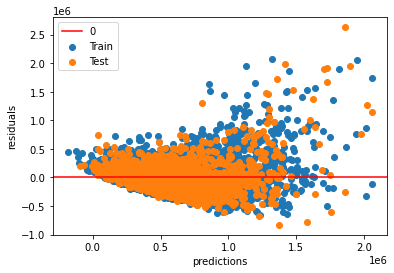

(15493    5.698910e+05
 4828     2.232323e+05
 21432    3.704192e+05
 17214    5.004180e+05
 8401     7.831324e+05
              ...     
 20479    4.328354e+05
 15346    4.251996e+05
 9013     7.214580e+05
 12095    3.168026e+05
 11328    1.175784e+06
 Length: 10757, dtype: float64,
 2813     1.001503e+06
 17869    5.240435e+05
 12736    2.909996e+05
 18714    3.783652e+05
 19298    5.143096e+05
              ...     
 19766    6.204060e+05
 19779    4.892484e+05
 18900    1.789949e+05
 20353    9.965840e+05
 1229     5.719492e+05
 Length: 3586, dtype: float64)

In [178]:
evaluate_model(
X_train,
X_test,
y_train,
y_test)

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?